In [9]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sciml.data.preprocessing.process_given_dataset import get_mu_xs_sol

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
d_p = 40
d_V = 40
epochs = 300    

In [11]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(100,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])

In [12]:
folder_path = "/home/janis/SCIML/summerschool/data/benchmarks/given/"

In [13]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs},folder_path="../../data/benchmarks/given/")

2025-08-04 18:00:29,891 - sciml.model.deeponet.deeponet - INFO - Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [14]:
mus, xs, sol = get_mu_xs_sol(folder_path,0.2)

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


In [15]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(2000, 100)
(2000, 100, 1)
(2000, 100)


In [16]:
train_history = model.fit()

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-08-04 18:00:32,716 - sciml.model.deeponet.deeponet - INFO - Epoch 1/300
2025-08-04 18:00:32,717 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.074977
2025-08-04 18:00:32,717 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.064495
Training progress:   0%|          | 1/300 [00:02<10:30,  2.11s/it]2025-08-04 18:00:34,716 - sciml.model.deeponet.deeponet - INFO - Epoch 2/300
2025-08-04 18:00:34,717 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.064162
2025-08-04 18:00:34,718 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.061827
Training progress:   1%|          | 2/300 [00:04<10:09,  2.04s/it]2025-08-04 18:00:36,721 - sciml.model.deeponet.deeponet - INFO - Epoch 3/300
2025-08-04 18:00:36,722 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.058865
2025-08-04 18:00:36,723 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.056827
Training progress:   1%|          | 3/300 [00:06<10:01,  

In [18]:
print(train_history)

([0.07497689127922058, 0.06416235864162445, 0.05886531248688698, 0.05490376055240631, 0.053049392998218536, 0.051903896033763885, 0.05116989463567734, 0.050742845982313156, 0.05043256655335426, 0.05035139620304108, 0.0500737763941288, 0.04989425092935562, 0.04972168803215027, 0.049602117389440536, 0.0499727688729763, 0.04950075224041939, 0.049373701214790344, 0.049353305250406265, 0.04974067211151123, 0.04938188195228577, 0.04925442859530449, 0.04921295493841171, 0.049194253981113434, 0.049512218683958054, 0.04934220388531685, 0.049177005887031555, 0.04913008213043213, 0.049125175923109055, 0.049113679677248, 0.04916517436504364, 0.04920404031872749, 0.04907875135540962, 0.04908384755253792, 0.04917724430561066, 0.04908381402492523, 0.049045175313949585, 0.049023792147636414, 0.049016885459423065, 0.049047600477933884, 0.04919920116662979, 0.049299903213977814, 0.04903094470500946, 0.0489945188164711, 0.048982925713062286, 0.04905484989285469, 0.049013614654541016, 0.04917551204562187,

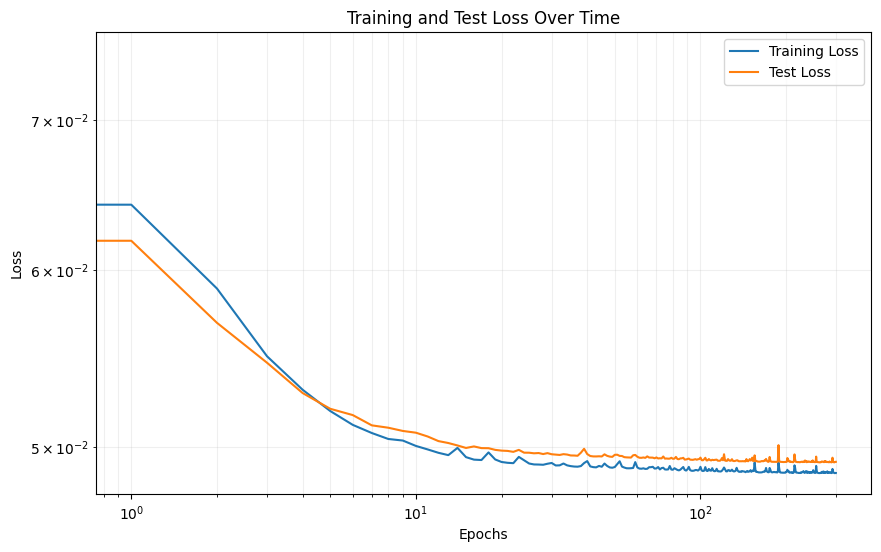

In [22]:
plt.figure(figsize=(10,6))
plt.plot(train_history[0], label='Training Loss')  # we plot training loss
plt.plot(train_history[1], label='Test Loss')  # we plot test loss
plt.yscale('log')  # we use log scale for better visualization
plt.grid(True, which="both", ls="-", alpha=0.2)  # we add grid with transparency
plt.xlabel('Epochs')  # we add x label
plt.ylabel('Loss')  # we add y label
plt.title('Training and Test Loss Over Time')  # we add title
plt.legend()  # we add legend
plt.yscale('log')
plt.xscale('log')
plt.show()